🧬 💵 Let's read salary data for biotech careers from [this public spreadsheet](https://docs.google.com/spreadsheets/d/1G0FmJhkOME_sv66hWmhnZS5qR2KMTY7nzkxksv46bfk).

First, load the `googlesheets4` package.

In [1]:
library ('googlesheets4')
library ('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
gs4_deauth()

In [5]:
salary_data = read_sheet (
    'https://docs.google.com/spreadsheets/d/1G0FmJhkOME_sv66hWmhnZS5qR2KMTY7nzkxksv46bfk/edit#gid=203339396')

salary_data |> head (1)

✔ Reading from "salary survey test (Responses)".

✔ Range Form Responses 1.



Timestamp,Where are you located? (Country and/or nearest Major city or hubs names),Biotech sub industry?,[OPTIONAL] Company Name,Company Details - public/private/start-up/ subsidiary of,Approximate Company Size,Role / Title of current position,Highest achieved Formal Education,Years of Experience,Compensation - Annual Base Salary/Pay,Compensation - Annual Target Bonus ($),Compensation - Annual Equity,[OPTIONAL] Sign on Bonus Value,[OPTIONAL] Sign on - Relocation Assistance Total Value
<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<list>,<list>,<dbl>,<list>
2022-05-08 00:17:11,test,Academia/Research,poop,Subsidiary,NA,pimp,High School or Equivalent,1,123,123,Not Applicable/None,123,12e


📈 Make a chart that shows the relationship between `Years of Experience` and `Compensation - Annual Base Salary/Pay`.

❗️ Remember that you need to use backticks to access columns whose names have spaces:

```
`Years of Experience`
```

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



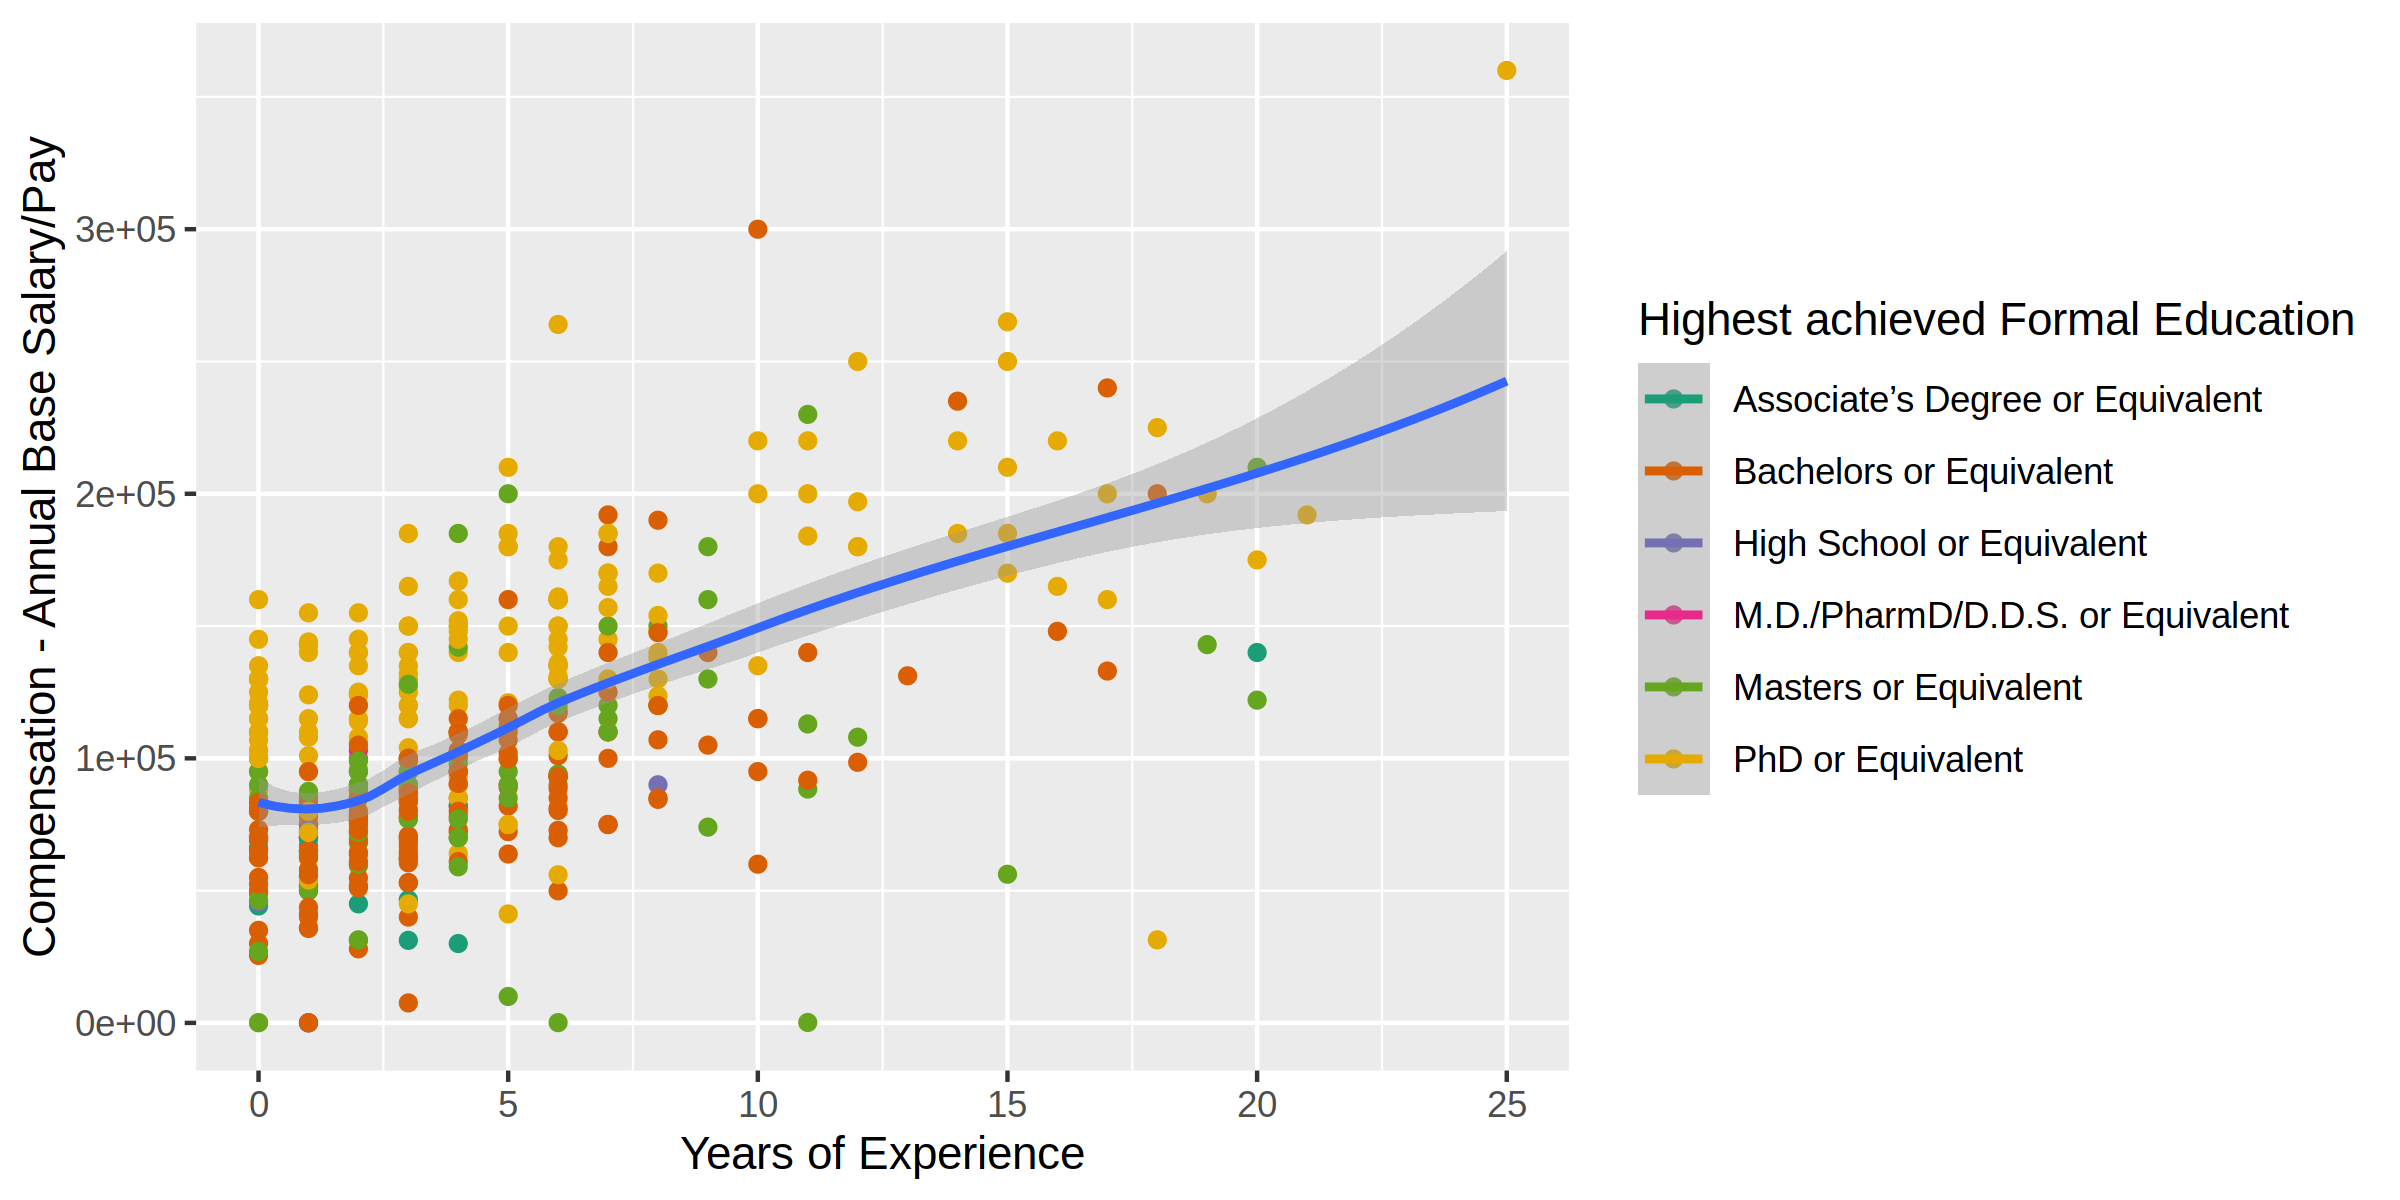

In [10]:
options(repr.plot.width = 8)
p = ggplot (salary_data, aes (x=`Years of Experience`, y = `Compensation - Annual Base Salary/Pay`,
                             color = `Highest achieved Formal Education`)) +
    geom_point() +
    scale_color_brewer(palette = 'Dark2') + 
    geom_smooth (aes (group=1))

p

📊 Count the number of respondents that belong to each `Highest achieved Formal Education` category. You can do this visually with `geom_bar` or in table form with `dplyr`...

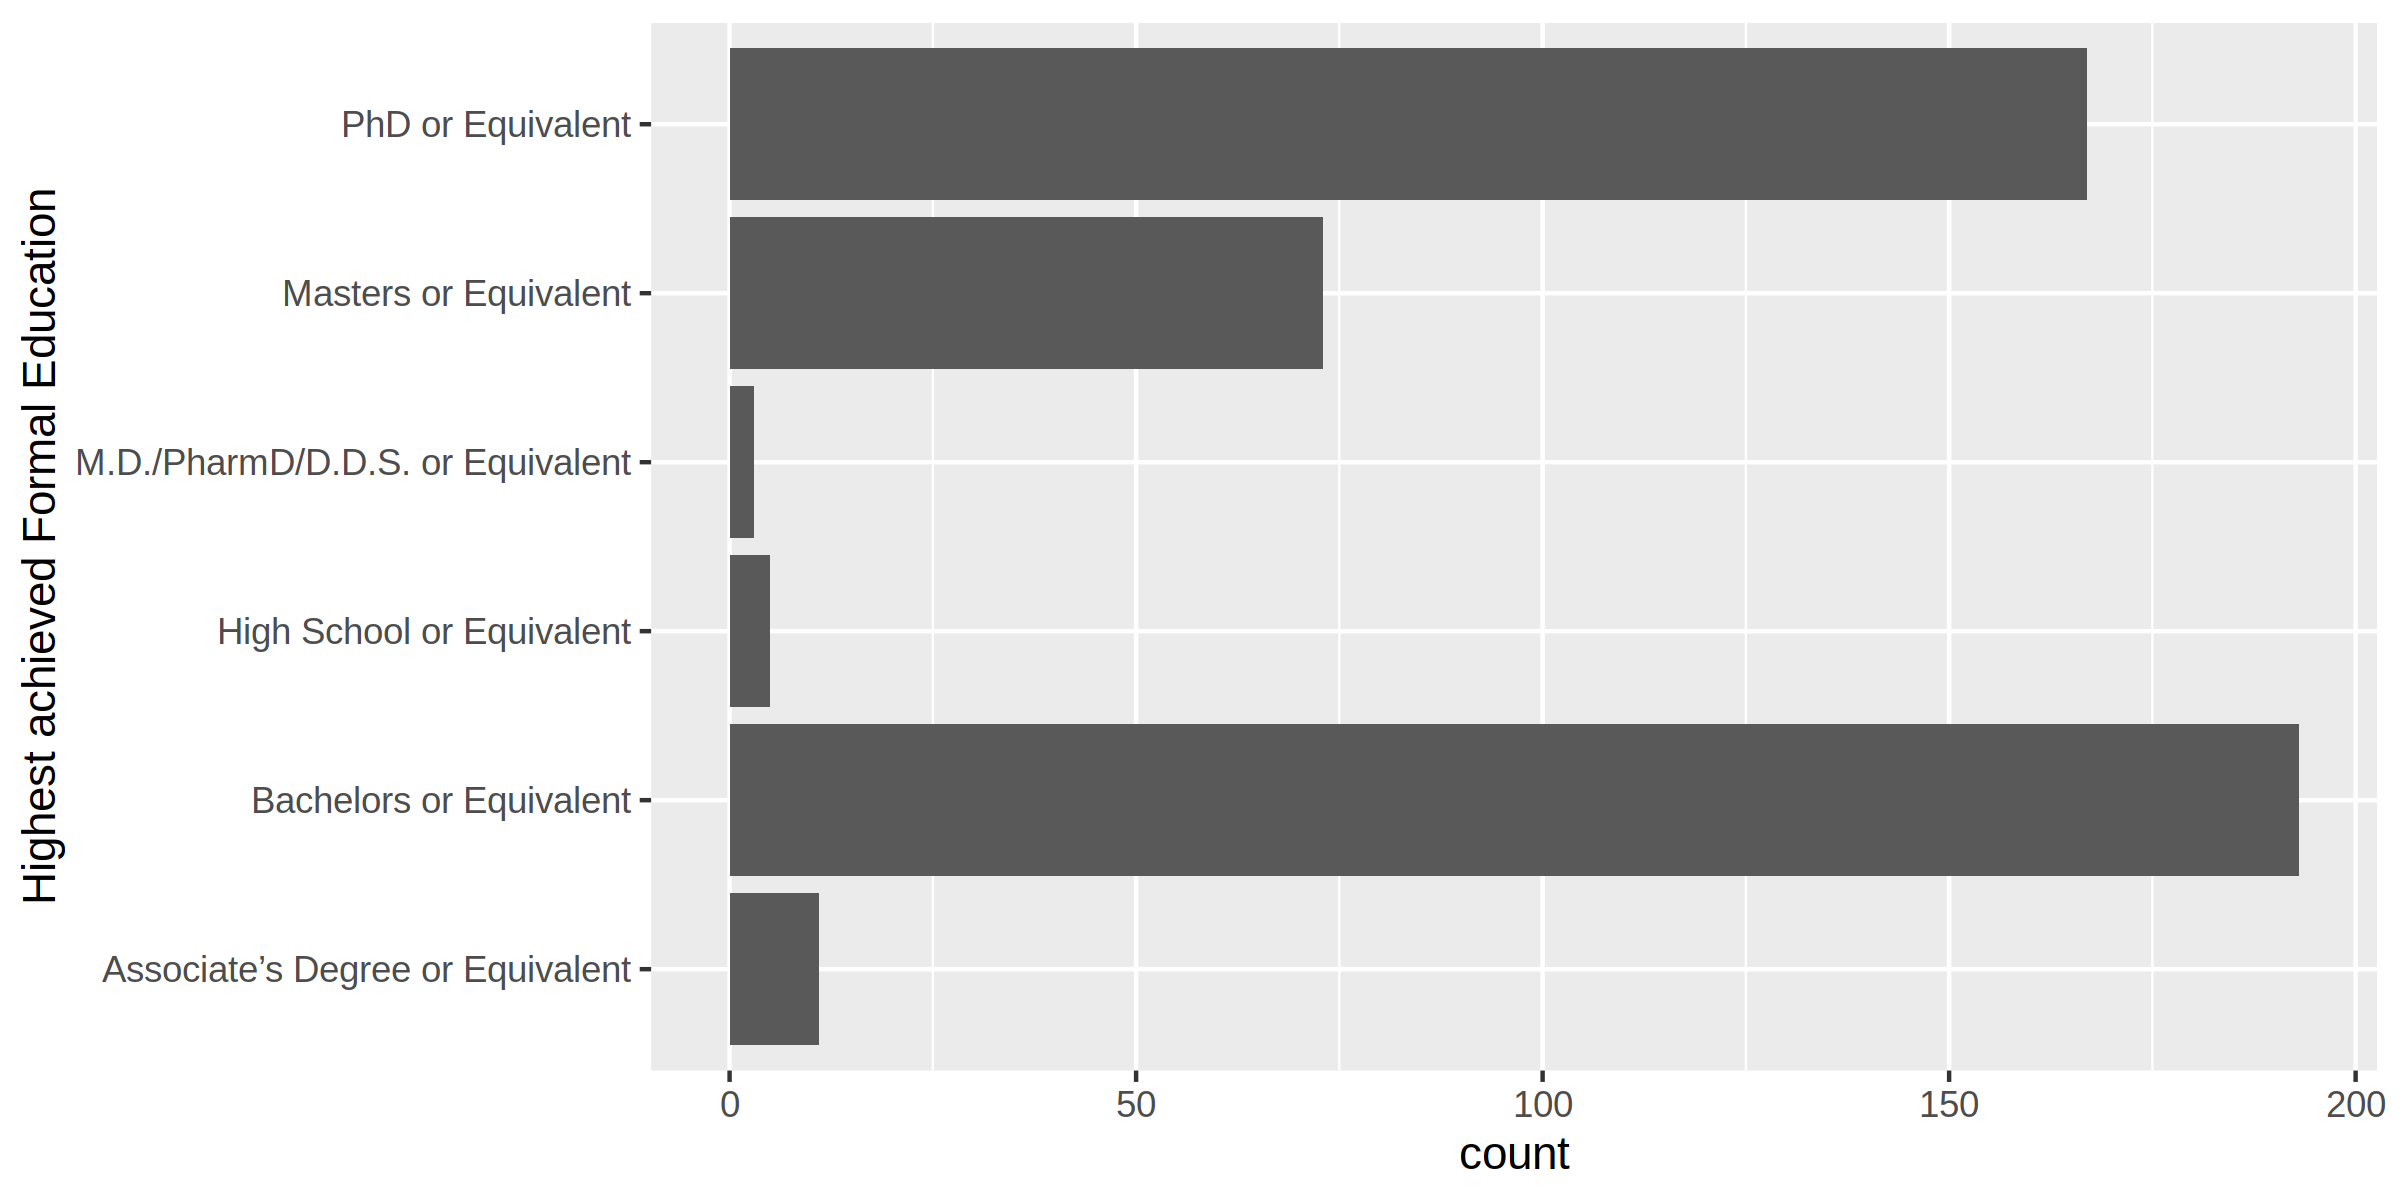

In [14]:
p = ggplot (salary_data, aes (y=`Highest achieved Formal Education`)) +
    geom_bar () 

p

📊 Make a histogram of `Compensation - Annual Base Salary/Pay` for respondents in the `Bachelors or Equivalent` group from the `Highest achieved Formal Education` column.,

In [18]:
Bach = salary_data |>
    group_by (`Highest achieved Formal Education`) |>
    summarize (n_respondents = n())

Bach |> head (6)


# OR

Bach2 = salary_data |> count (`Highest achieved Formal Education`)

Bach2 |> head ()
    

Highest achieved Formal Education,n_respondents
<chr>,<int>
Associate’s Degree or Equivalent,11
Bachelors or Equivalent,193
High School or Equivalent,5
M.D./PharmD/D.D.S. or Equivalent,3
Masters or Equivalent,73
PhD or Equivalent,167


Highest achieved Formal Education,n
<chr>,<int>
Associate’s Degree or Equivalent,11
Bachelors or Equivalent,193
High School or Equivalent,5
M.D./PharmD/D.D.S. or Equivalent,3
Masters or Equivalent,73
PhD or Equivalent,167


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



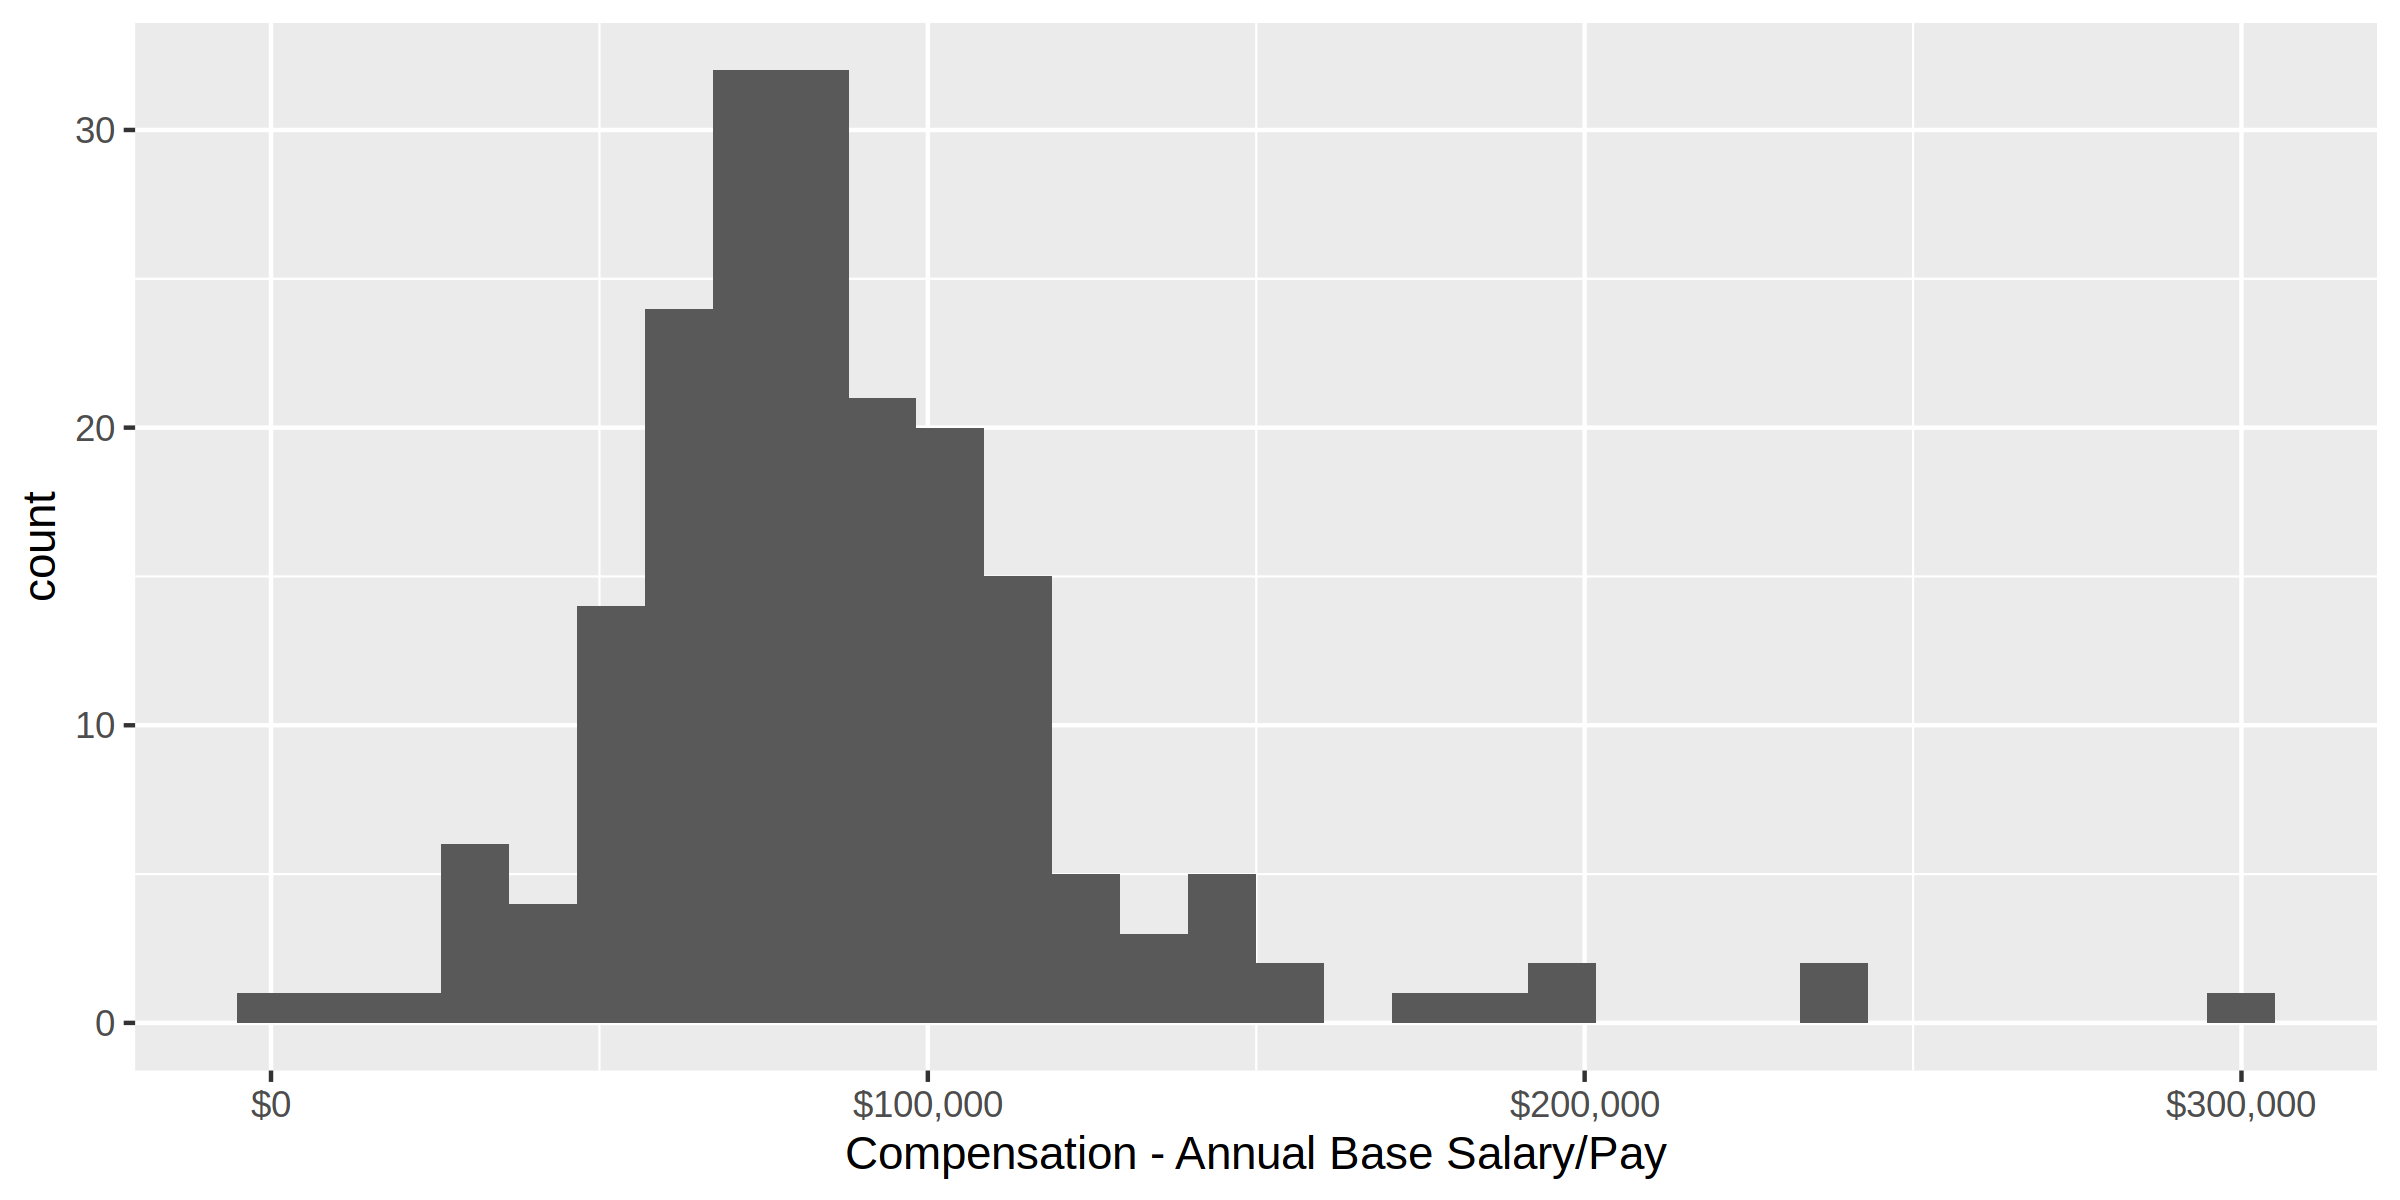

In [21]:
Bach3 = salary_data |> 
    filter (`Highest achieved Formal Education` == 'Bachelors or Equivalent')

p = ggplot (Bach3, aes (x = `Compensation - Annual Base Salary/Pay`)) +
    geom_histogram () +
    scale_x_continuous (labels = scales :: dollar_format ())

p

In [ ]:
p = ggplot (salary_data, aes (